In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./preprocessed_weatherAUS.csv")

In [3]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,22.0,1007.7,1007.1,8.000000,4.50993,0.0,0.0
1,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,25.0,1010.6,1007.8,4.447461,4.50993,0.0,0.0
2,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,30.0,1007.6,1008.7,4.447461,2.00000,0.0,0.0
3,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,16.0,1017.6,1012.8,4.447461,4.50993,0.0,0.0
4,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,33.0,1010.8,1006.0,7.000000,8.00000,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136653 entries, 0 to 136652
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       136653 non-null  int64  
 1   MinTemp        136653 non-null  float64
 2   MaxTemp        136653 non-null  float64
 3   Rainfall       136653 non-null  float64
 4   Evaporation    136653 non-null  float64
 5   Sunshine       136653 non-null  float64
 6   WindGustDir    136653 non-null  int64  
 7   WindGustSpeed  136653 non-null  float64
 8   WindDir9am     136653 non-null  int64  
 9   WindDir3pm     136653 non-null  int64  
 10  WindSpeed9am   136653 non-null  float64
 11  WindSpeed3pm   136653 non-null  float64
 12  Humidity3pm    136653 non-null  float64
 13  Pressure9am    136653 non-null  float64
 14  Pressure3pm    136653 non-null  float64
 15  Cloud9am       136653 non-null  float64
 16  Cloud3pm       136653 non-null  float64
 17  RainToday      136653 non-nul

In [5]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [7]:
X = df.loc[:, df.columns != "raintomorrow"]

In [8]:
y = df["RainTomorrow"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [13]:
os = SMOTE()
X_train, y_train = os.fit_resample(X_train, y_train)
count = Counter(y_train)
print(count)

Counter({0.0: 86876, 1.0: 86876})


In [15]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,28,11.900000,11.900000,0.000000,6.400000,10.900000,4,31.000000,1,5,17.000000,15.000000,19.000000,1022.000000,1019.400000,4.000000,5.000000,0.000000,0.0
1,8,27.200000,27.200000,0.000000,5.468232,7.611178,10,41.000000,10,10,6.000000,22.000000,78.000000,1009.800000,1007.400000,6.000000,3.000000,0.000000,0.0
2,36,10.200000,10.200000,9.800000,5.468232,7.611178,14,57.000000,3,14,17.000000,26.000000,74.000000,1017.649940,1015.255889,4.447461,4.509930,1.000000,1.0
3,12,15.800000,15.800000,0.200000,5.200000,8.200000,13,70.000000,3,12,19.000000,26.000000,85.000000,1004.100000,1004.400000,4.447461,4.509930,0.000000,1.0
4,37,20.500000,20.500000,0.000000,8.600000,1.500000,13,40.035230,0,0,15.000000,20.000000,54.000000,1017.500000,1016.900000,7.000000,7.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173747,3,24.629843,24.629843,0.000000,7.805236,6.330190,9,54.216404,9,8,19.458989,30.541011,41.865617,1004.567887,999.781673,6.108202,5.891798,0.000000,1.0
173748,21,11.264141,11.264141,2.726834,2.536824,3.163417,12,51.909748,13,14,14.363417,26.636583,81.681709,1014.413779,1014.072683,5.636583,7.681709,0.681709,1.0
173749,10,10.966502,10.966502,8.537969,3.015881,7.611178,5,45.359802,5,3,26.426798,13.292806,96.213399,1019.596277,1017.643174,8.000000,7.213399,0.786601,1.0
173750,13,7.262390,7.262390,4.417556,1.126401,5.288698,6,48.528022,7,1,6.424038,9.160027,74.632005,1013.148008,1009.430385,5.386782,5.426262,1.000000,1.0


In [41]:
pset = gp.PrimitiveSetTyped("main", [type(df[col][0]) for col in df], bool, "IN")

In [42]:
import operator
import numpy
from functools import partial
import random

In [43]:
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)
pset.addPrimitive(operator.not_, [bool], bool)

# numpy.float64ing point operators
# Define a protected division function
def protectedDiv(left, right):
    try: return left / right
    except ZeroDivisionError: return 1

pset.addPrimitive(operator.add, [numpy.float64,numpy.float64], numpy.float64)
pset.addPrimitive(operator.sub, [numpy.float64,numpy.float64], numpy.float64)
pset.addPrimitive(operator.mul, [numpy.float64,numpy.float64], numpy.float64)
pset.addPrimitive(protectedDiv, [numpy.float64,numpy.float64], numpy.float64)

# logic operators
# Define a new if-then-else function
def if_then_else(input, output1, output2):
    if input: return output1
    else: return output2

pset.addPrimitive(operator.lt, [numpy.float64, numpy.float64], bool)
pset.addPrimitive(operator.eq, [numpy.float64, numpy.float64], bool)
pset.addPrimitive(if_then_else, [bool, numpy.float64, numpy.float64], numpy.float64)

# terminals
pset.addEphemeralConstant("rand_norm", partial(numpy.float64, random.random()), numpy.float64)
pset.addTerminal(False, bool)
pset.addTerminal(True, bool)

In [44]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

/Users/deebakkarthi/.local/share/conda/envs/deap_testing/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/deebakkarthi/.local/share/conda/envs/deap_testing/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [45]:
from sklearn.metrics import f1_score

In [46]:
def evaluate(individulal):
    func = toolbox.compile(expr=individulal)
    y_pred = [func(*data) for _, data in X_train.iterrows()]
    return f1_score(y_train, y_pred),

In [47]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

In [48]:
pop = toolbox.population(n=100)

In [49]:
hof = tools.HallOfFame(1)

In [50]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [51]:
algorithms.eaSimple(pop, toolbox, 0.5, 0.2, 40, stats, halloffame=hof)

gen	nevals	avg     	std     	min	max    
0  	100   	0.221867	0.303029	0  	0.67137
1  	48    	0.441136	0.302629	0  	0.684922
2  	61    	0.557814	0.244921	0  	0.745061
3  	51    	0.553116	0.251043	0  	0.745061
4  	66    	0.58994 	0.220407	0  	0.907533
5  	56    	0.60126 	0.223792	0  	0.998185
6  	64    	0.657489	0.161752	0  	0.998185
7  	60    	0.701645	0.144346	0  	1       
8  	70    	0.701595	0.193684	0  	1       
9  	64    	0.788289	0.141246	0  	1       
10 	62    	0.851624	0.153854	0  	0.971742
11 	59    	0.883228	0.170717	0.157137	0.995508
12 	50    	0.912627	0.167499	0       	0.995508
13 	70    	0.943861	0.1265  	0.0288029	0.995671
14 	70    	0.943728	0.131949	0.00877846	0.998963
15 	59    	0.939101	0.159856	0.000713406	0.999994
16 	66    	0.980143	0.0558529	0.666662   	1       
17 	65    	0.941766	0.186605 	0          	1       
18 	61    	0.953418	0.184439 	0          	1       
19 	44    	0.97943 	0.0746575	0.617052   	1       
20 	58    	0.93684 	0.18247  	0          	1       
21

([[<deap.gp.Primitive at 0x17ec74130>,
 [{'gen': 0,
   'nevals': 100,
   'avg': 0.22186719933162585,
   'std': 0.3030292408105782,
   'min': 0.0,
   'max': 0.6713703612546832},
  {'gen': 1,
   'nevals': 48,
   'avg': 0.4411357930575351,
   'std': 0.3026292638127301,
   'min': 0.0,
   'max': 0.6849217905764841},
  {'gen': 2,
   'nevals': 61,
   'avg': 0.5578144312673402,
   'std': 0.2449212033851161,
   'min': 0.0,
   'max': 0.74506102931924},
  {'gen': 3,
   'nevals': 51,
   'avg': 0.5531161251033556,
   'std': 0.2510432180784215,
   'min': 0.0,
   'max': 0.74506102931924},
  {'gen': 4,
   'nevals': 66,
   'avg': 0.5899399965693027,
   'std': 0.22040733595562043,
   'min': 0.0,
   'max': 0.9075329212874407},
  {'gen': 5,
   'nevals': 56,
   'avg': 0.6012600187706499,
   'std': 0.2237915492020695,
   'min': 0.0,
   'max': 0.9981846175058023},
  {'gen': 6,
   'nevals': 64,
   'avg': 0.6574887401499884,
   'std': 0.16175228505302588,
   'min': 0.0,
   'max': 0.9981846175058023},
  {'gen':

In [52]:
gp.graph(hof[0])

([0, 1, 2, 3, 4, 5, 6, 7],
 [(0, 1), (1, 2), (2, 3), (2, 4), (4, 5), (4, 6), (1, 7)],
 {0: 'not_',
  1: 'and_',
  2: 'eq',
  3: 'IN2',
  4: 'add',
  5: 'IN18',
  6: 'IN1',
  7: True})

In [53]:
import pygraphviz as pgv

In [54]:
nodes, edges, labels = gp.graph(hof[0])
g = pgv.AGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
g.layout(prog="dot")

for i in nodes:
    n = g.get_node(i)
    n.attr["label"] = labels[i]

g.draw("tree.pdf")

In [55]:
evaluate(hof[0])

(1.0,)

In [71]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [61]:
func = toolbox.compile(expr=hof[0])
y_pred = [func(*data) for _, data in X_test.iterrows()]

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21627
         1.0       1.00      1.00      1.00      5704

    accuracy                           1.00     27331
   macro avg       1.00      1.00      1.00     27331
weighted avg       1.00      1.00      1.00     27331



In [65]:
accuracy_score(y_test, y_pred)

1.0

In [66]:
y_train_pred = [func(*data) for _, data in X_train.iterrows()]

In [67]:
print(classification_report(y_pred=y_train_pred, y_true=y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86876
         1.0       1.00      1.00      1.00     86876

    accuracy                           1.00    173752
   macro avg       1.00      1.00      1.00    173752
weighted avg       1.00      1.00      1.00    173752



In [70]:
accuracy_score(y_train, y_train_pred)

1.0

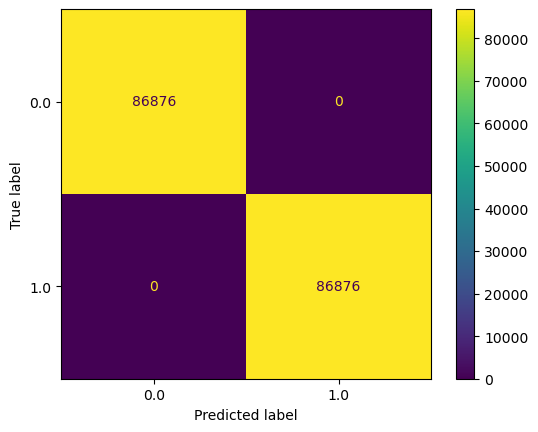

In [72]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)